# First Impression and Plan of Action
On first examination of the datasets I was a little taken aback with the sheer amount of information to process.

However after spending some time inspecting each dataset and the README.md (I understand now why it is called **README**), I have gained several insights and I have a clear idea of what my final dataset will look like.

In my final dataset I will have it structured as so, here are a list of columns:

1. Datetime
2. Each Location (place) with footfall count as row values

First I need to import the necessary libraries for my project below:


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##File System
In my filing system I have created a directory named 'intermediary' where I will store files during the cleaning process. These files are open to manipulation unlike the the raw data, however I do not want to place any files in my processed folder unless they are cleaned, processed and ready for submission.

#2010 Dataset Examination
Exploring different aspects of the dataset for errors.
Things to look out for are null values, incorrect data types, spelling errors, duplicates.

In [ ]:
#Here I want to change my json file to a csv file for cleaning and processing.
df = pd.read_json('/content/a3-2010.json')
df.to_csv('/content/a3-2010.csv')

In [ ]:
ten_df = pd.read_csv('/content/a3-2010.csv')

In [ ]:
ten_df.head()

,Unnamed: 0,Unnamed: 0.1,O'Connell Street at Clerys,Grafton St at Card Gallery,Grafton St at M&S,O'Connell Street at Easons,Henry Street at Butlers,Grafton St at Korkys
0,0,01/01/2010 00:00,852,1134,229,131,78,421
1,1,01/01/2010 01:00,736,1281,276,92,44,634
2,2,01/01/2010 02:00,1064,1839,944,74,28,995
3,3,01/01/2010 03:00,1646,2683,1219,106,49,979
4,4,01/01/2010 04:00,598,865,491,35,47,356


In [ ]:
#Changing the 'Unnamed: 0.1' to 'Datetime'
ten_df.pop('Unnamed: 0')
ten_df.columns = ['Datetime', "O'Connell Street at Clerys", 'Grafton St at Card Gallery', 'Grafton St at M&S', "O'Connell Street at Easons", 'Henry Street at Butlers', 'Grafton St at Korkys']

In [ ]:
ten_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Datetime                    8737 non-null   object
 1   O'Connell Street at Clerys  8737 non-null   object
 2   Grafton St at Card Gallery  8737 non-null   int64 
 3   Grafton St at M&S           8737 non-null   int64 
 4   O'Connell Street at Easons  8737 non-null   int64 
 5   Henry Street at Butlers     8737 non-null   int64 
 6   Grafton St at Korkys        8737 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 477.9+ KB


## 2010 Cleaning To Do list
1. Datetime must be changed from object to datetime datatype
2. Change 'O'Connell Street at Clerys' to int64 dtype

In [ ]:
ten_df.Datetime = pd.to_datetime(ten_df.Datetime)

In [ ]:
# Converting object to int64
ten_df.iloc[:, 1] = pd.to_numeric(ten_df.iloc[:, 1]) 

ValueError: ignored

##**ERROR!**
It won't allow me to convert the column to int64 because of an error on index 3817, let's check it out:

In [ ]:
ten_df.iloc[3817, 1] # outputs string 'O', a capital o, clever...
ten_df.iloc[3817, 1] = 0
ten_df.iloc[:, 1] = pd.to_numeric(ten_df.iloc[:, 1]) 
ten_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Datetime                    8737 non-null   datetime64[ns]
 1   O'Connell Street at Clerys  8737 non-null   int64         
 2   Grafton St at Card Gallery  8737 non-null   int64         
 3   Grafton St at M&S           8737 non-null   int64         
 4   O'Connell Street at Easons  8737 non-null   int64         
 5   Henry Street at Butlers     8737 non-null   int64         
 6   Grafton St at Korkys        8737 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 477.9 KB


In [ ]:
ten_df.describe()

,O'Connell Street at Clerys,Grafton St at Card Gallery,Grafton St at M&S,O'Connell Street at Easons,Henry Street at Butlers,Grafton St at Korkys
count,8737.000000,8737.000000,8737.000000,8737.00000,8737.000000,8737.000000
mean,1595.807028,2954.744191,2923.760673,1248.46801,2143.037541,2449.119263
std,1402.822650,2803.571683,2320.102088,1530.90479,2251.204460,10925.478270
min,0.000000,0.000000,0.000000,2.00000,0.000000,0.000000
25%,319.000000,653.000000,661.000000,149.00000,239.000000,478.000000
50%,1318.000000,1990.000000,2421.000000,607.00000,991.000000,1401.000000
75%,2544.000000,4824.000000,5006.000000,1792.00000,4012.000000,3695.000000
max,12377.000000,14974.000000,8536.000000,9182.00000,12181.000000,999999.000000


There are no negative values, however the max value for the count of people for grafton st at korkys is a little spurious, 999999 is an incredibly large number and an outlier from the rest of the data set. This is represented in the large std.

In [ ]:
ten_df['Grafton St at Korkys'].sort_values(ascending=False)

8321    999999
1814     15085
1815     13161
1813     12829
1047     11972
         ...  
8618        13
8597        11
8616        10
8621         5
2065         0
Name: Grafton St at Korkys, Length: 8737, dtype: int64

The 999999 is clearly an error which must be amended and it will be added to the list

## 2010 Cleaning To Do list
1. ~~Datetime must be changed from object to datetime datatype~~
2. ~~Change 'O'Connell Street at Clerys' to int64 dtype~~
3. Grafton Street At Korkys max value 999999 must be changed.

In [ ]:
#Checking whether the datetime has duplicates by comparing unique value length with actual length
len(ten_df.Datetime.unique()) == len(ten_df.Datetime)

True

In [ ]:
# Updating 999999 to the median value of the column set so as to skew the data in the minimalist way.
# First locate the index of the entry
ten_df.loc[ten_df['Grafton St at Korkys'] == 999999]
# Then update to the median
ten_df.iloc[8321, 6] = ten_df['Grafton St at Korkys'].median()

In [ ]:
# While this is an imperfect compromise, I think it is the lesser evil.
ten_df.describe()

,O'Connell Street at Clerys,Grafton St at Card Gallery,Grafton St at M&S,O'Connell Street at Easons,Henry Street at Butlers,Grafton St at Korkys
count,8737.000000,8737.000000,8737.000000,8737.00000,8737.000000,8737.000000
mean,1595.807028,2954.744191,2923.760673,1248.46801,2143.037541,2334.823967
std,1402.822650,2803.571683,2320.102088,1530.90479,2251.204460,2333.347248
min,0.000000,0.000000,0.000000,2.00000,0.000000,0.000000
25%,319.000000,653.000000,661.000000,149.00000,239.000000,478.000000
50%,1318.000000,1990.000000,2421.000000,607.00000,991.000000,1401.000000
75%,2544.000000,4824.000000,5006.000000,1792.00000,4012.000000,3695.000000
max,12377.000000,14974.000000,8536.000000,9182.00000,12181.000000,15085.000000


## 2010 Cleaning To Do list
1. ~~Datetime must be changed from object to datetime datatype~~
2. ~~Change 'O'Connell Street at Clerys' to int64 dtype~~
3. ~~Grafton Street At Korkys max value 999999 must be changed.~~

After cleaning the other datasets I will have to inspect the columns and change some names

In [ ]:
#Save back to csv file
ten_df.to_csv('/content/a3-2010.csv')

# 2019/2020 Datasets Examination
I will take a similar approach as I did with the 2010 dataset. The format of these datasets are more accesible, I can in fact work with the 4 datasets simultaneously where the errors are shared. I will look at what errors need to be done seperately in 2019 and 2020 and what can be done collectively. Complete individual errors then combine and work on collective errors, this will make for a better workflow.

In [ ]:
nteen_jan_df = pd.read_excel('/content/a3-2019-jan-jun.xlsx')

In [ ]:
nteen_jan_df.head()

,Time,O'Connell St Outside Pennys,O'Connell St Outside Clerys,Mary Street,Capel Street,Aston Quay,Grafton Street @ CompuB,Talbot Street North,"Doilier Street, Burgh Quay",Dawson Street Replacement,Dame Street,Talbot Street South,"O'Connell St, Parnell St @ AIB",Grafton Street / Nassau Street / Suffolk Street,"College Green, Bank Of Ireland",Henry Street,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street,Bachelors Walk,College Green @ Church Lane,College Green - Dame St Side
0,2019-01-01 00:00:00,244,1914.0,20,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,1670.0,255.0,881.0,1988.0,140.0,NaN,NaN,NaN
1,2019-01-01 00:15:00,454,NaN,24,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01 00:30:00,391,NaN,69,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01 00:45:00,415,NaN,50,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01 01:00:00,319,885.0,24,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,767.0,209.0,723.0,1270.0,215.0,NaN,NaN,NaN


In [ ]:
nteen_jan_df.describe()

,O'Connell St Outside Pennys,O'Connell St Outside Clerys,Mary Street,Capel Street,Aston Quay,Grafton Street @ CompuB,Talbot Street North,"Doilier Street, Burgh Quay",Dawson Street Replacement,Dame Street,Talbot Street South,"O'Connell St, Parnell St @ AIB",Grafton Street / Nassau Street / Suffolk Street,"College Green, Bank Of Ireland",Henry Street,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street,Bachelors Walk,College Green @ Church Lane,College Green - Dame St Side
count,17355.000000,4338.000000,17355.000000,17355.000000,11871.000000,11883.000000,11822.000000,11871.000000,0.0,11883.00000,11871.000000,9955.000000,11883.000000,11883.000000,17355.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,9305.000000,11295.000000,11295.000000
mean,352.886949,988.570309,68.363065,68.585653,197.174627,392.273332,470.200305,179.557325,NaN,204.97568,880.454637,182.450326,112.391147,235.353699,437.941976,582.553481,363.187183,832.351544,842.804288,1060.473260,328.277378,214.095529,194.182824
std,294.069529,683.698289,73.050884,88.476840,124.438535,334.331884,522.641280,115.125087,NaN,146.02500,1075.739090,138.137131,97.198677,168.809465,430.160919,413.853551,341.825484,722.113211,497.264027,1039.738554,10371.001827,151.497668,156.096003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,316.000000,7.000000,13.000000,87.000000,58.000000,35.000000,83.000000,NaN,60.00000,271.000000,39.000000,24.000000,70.000000,36.000000,195.250000,37.000000,162.000000,384.250000,230.250000,52.000000,64.000000,43.000000
50%,273.000000,1022.500000,36.000000,58.000000,207.000000,350.000000,323.000000,190.000000,NaN,204.00000,444.000000,177.000000,92.000000,229.000000,263.000000,574.000000,264.000000,701.000000,897.000000,719.000000,143.000000,219.000000,180.000000
75%,605.000000,1545.000000,117.000000,108.000000,285.500000,672.000000,727.000000,262.000000,NaN,319.00000,710.000000,306.000000,179.000000,363.000000,839.500000,877.000000,607.000000,1368.000000,1224.750000,1488.750000,229.000000,340.000000,306.000000
max,1141.000000,3317.000000,329.000000,1481.000000,655.000000,2320.000000,3063.000000,809.000000,NaN,753.00000,5306.000000,623.000000,788.000000,1463.000000,1621.000000,2852.000000,2047.000000,4388.000000,2478.000000,5427.000000,999999.000000,612.000000,1108.000000


In [ ]:
nteen_jan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17355 entries, 0 to 17354
Data columns (total 24 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Time                                             17355 non-null  datetime64[ns]
 1   O'Connell St Outside Pennys                      17355 non-null  int64         
 2   O'Connell St Outside Clerys                      4338 non-null   float64       
 3   Mary Street                                      17355 non-null  int64         
 4   Capel Street                                     17355 non-null  int64         
 5   Aston Quay                                       11871 non-null  float64       
 6   Grafton Street @ CompuB                          11883 non-null  float64       
 7   Talbot Street North                              11822 non-null  float64       
 8   Doilier Street, Burgh Quay          

In [ ]:
nteen_jul_df = pd.read_excel('/content/a3-2019-Jul-Dec.xlsx')

In [ ]:
nteen_jul_df.head()

,Time,O'Connell St Outside Pennys,O'Connell St Outside Clerys,Mary Street,Capel Street,Aston Quay,Grafton Street @ CompuB,Talbot Street North,"Doilier Street, Burgh Quay",Dawson Street Replacement,Dame Street,Talbot Street South,"O'Connell St, Parnell St @ AIB",Grafton Street / Nassau Street / Suffolk Street,"College Green, Bank Of Ireland",Henry Street,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street,Bachelors Walk,College Green @ Church Lane,College Green - Dame St Side
0,2019-07-01 00:00:00,81,165.0,8,16,52.0,96,54.0,36,NaN,49,450.0,42,12,64,43.0,83.0,22.0,101.0,319.0,330.0,9,45,42
1,2019-07-01 00:15:00,63,NaN,4,13,28.0,93,71.0,12,NaN,38,328.0,32,6,66,33.0,NaN,NaN,NaN,NaN,NaN,8,24,5
2,2019-07-01 00:30:00,60,NaN,1,11,30.0,90,12.0,12,NaN,35,295.0,30,12,56,14.0,NaN,NaN,NaN,NaN,NaN,5,34,12
3,2019-07-01 00:45:00,61,NaN,0,11,32.0,70,6.0,8,NaN,40,375.0,30,8,46,31.0,NaN,NaN,NaN,NaN,NaN,28,9,10
4,2019-07-01 01:00:00,36,75.0,0,7,33.0,69,3.0,9,NaN,39,443.0,21,6,26,15.0,55.0,11.0,59.0,169.0,226.0,7,14,8


In [ ]:
nteen_jul_df.describe()

,O'Connell St Outside Pennys,O'Connell St Outside Clerys,Mary Street,Capel Street,Aston Quay,Grafton Street @ CompuB,Talbot Street North,"Doilier Street, Burgh Quay",Dawson Street Replacement,Dame Street,Talbot Street South,"O'Connell St, Parnell St @ AIB",Grafton Street / Nassau Street / Suffolk Street,"College Green, Bank Of Ireland",Henry Street,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street,Bachelors Walk,College Green @ Church Lane,College Green - Dame St Side
count,17664.000000,4416.000000,17664.000000,17664.000000,17484.000000,17664.000000,17556.000000,17664.000000,3363.000000,17664.000000,17652.000000,17664.000000,17664.000000,17664.000000,11040.000000,4416.000000,2424.000000,4416.000000,4416.000000,4416.000000,17664.000000,17664.000000,17664.000000
mean,351.319407,1055.188859,49.909590,59.692255,271.568119,516.920743,32.383857,175.953465,57.362177,196.489980,358.736857,180.181386,116.810236,172.713542,468.280435,504.886096,406.429043,711.630208,1153.130435,1386.419611,132.673856,211.135134,196.550725
std,293.309937,747.546902,56.852577,48.828766,233.725970,355.237967,34.868302,189.026522,60.197624,139.081577,194.375864,138.180604,98.604715,140.490257,455.630958,380.456930,361.342994,649.521495,703.660722,1158.822168,111.151749,153.989232,159.230354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,305.750000,5.000000,13.000000,102.000000,165.000000,7.000000,48.000000,19.000000,60.000000,214.000000,40.000000,27.000000,54.000000,41.000000,137.750000,62.750000,115.000000,514.500000,346.750000,33.000000,58.000000,42.000000
50%,275.000000,1087.500000,23.000000,54.000000,219.000000,526.000000,23.000000,138.000000,46.000000,192.000000,316.000000,170.000000,95.000000,137.000000,299.000000,487.000000,328.000000,541.000000,1168.000000,1022.500000,115.000000,211.000000,178.000000
75%,597.000000,1685.000000,85.000000,98.000000,344.000000,803.000000,49.000000,220.000000,84.000000,301.000000,467.000000,307.000000,189.000000,262.000000,875.250000,790.000000,675.000000,1189.000000,1665.250000,2385.000000,203.000000,340.000000,316.000000
max,1230.000000,3798.000000,337.000000,965.000000,1305.000000,1931.000000,674.000000,1721.000000,2157.000000,644.000000,1872.000000,551.000000,642.000000,770.000000,1965.000000,1803.000000,1547.000000,3748.000000,3280.000000,5173.000000,916.000000,666.000000,912.000000


There is no negative values and no outliers

In [ ]:
nteen_jul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17664 entries, 0 to 17663
Data columns (total 24 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Time                                             17664 non-null  datetime64[ns]
 1   O'Connell St Outside Pennys                      17664 non-null  int64         
 2   O'Connell St Outside Clerys                      4416 non-null   float64       
 3   Mary Street                                      17664 non-null  int64         
 4   Capel Street                                     17664 non-null  int64         
 5   Aston Quay                                       17484 non-null  float64       
 6   Grafton Street @ CompuB                          17664 non-null  int64         
 7   Talbot Street North                              17556 non-null  float64       
 8   Doilier Street, Burgh Quay          

##Plan of Action
For 2019 there are several things which I would like to do amend as can be seen below in the list. Many of these operations I am more comfortable performing in pandas.

##2019 Cleaning list
1. Unify column names eg. '@', 'Outside', ',' and other propositions -> at (as seen in 2010)
2. Update hour rows to sum of counts in that hour
3. Delete quarterly hour rows.
4. Replace null values as zero
5. Rename Time to Datetime
6. Convert Float64 to int64 data type
7. Update 999999 in nteen_jan_df to median

##2020 Examination
Searching for errors in 2020 then comparing

In [283]:
twenty_jan_df = pd.read_csv('/content/a3-2020-jan-jun.csv')

In [268]:
twenty_jan_df.head()

,Date and Time,OConnell St Outside Pennys,OConnell St Outside Clerys,Mary Street,Capel Street,Aston Quay,Grafton Street at CompuB,Talbot Street North,Doilier Street Burgh Quay,Dawson Street Replacement,Dame Street,Talbot Street South,OConnell St Parnell St at AIB,Grafton Street - Nassau Street - Suffolk Street,College Green Bank Of Ireland,Henry Street,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street,Bachelors Walk,College Green at Church Lane,College Green - Dame St Side
0,01/01/2020 00:00,1662,2195,60,277,1600,3481,109,994,18,1090.0,1085,821,1238,893,NaN,1577,NaN,1180,2593,1516.0,868,1494,1797
1,01/01/2020 01:00,1160,990,33,214,858,1870,53,745,7,1148.0,1296,469,405,1091,NaN,566,NaN,1133,1917,1169.0,727,676,594
2,01/01/2020 02:00,1110,856,51,219,3499,1626,71,710,15,1052.0,1848,347,382,1202,NaN,474,NaN,898,1889,1097.0,930,523,429
3,01/01/2020 03:00,1095,842,44,176,1804,1280,49,1065,8,899.0,1783,373,353,1115,NaN,410,NaN,595,2101,989.0,561,520,365
4,01/01/2020 04:00,666,351,25,98,2562,824,40,768,9,373.0,1705,209,136,1140,NaN,120,NaN,219,873,708.0,269,238,176


Date and time rather than Datetime

In [ ]:
twenty_jan_df.describe()

,Capel Street,Aston Quay,Grafton Street at CompuB,Talbot Street North,Doilier Street Burgh Quay,Dawson Street Replacement,Dame Street,Talbot Street South,OConnell St Parnell St at AIB,Grafton Street - Nassau Street - Suffolk Street,College Green Bank Of Ireland,Henry Street,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street,Bachelors Walk,College Green at Church Lane,College Green - Dame St Side
count,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000,4340.000000,4367.000000,4367.000000,4367.000000,4367.000000,3515.000000,4367.000000,0.0,4367.000000,4367.000000,3359.00000,4367.000000,4367.000000,4367.000000
mean,142.339134,1336.354706,1153.098695,267.770323,588.333181,137.748569,352.037327,747.570414,414.531028,190.776506,486.385161,1018.496444,206.531944,NaN,493.507671,621.067094,562.54808,248.533318,371.231051,328.848180
std,148.644493,1187.779440,1519.316396,362.843912,685.956108,112.545279,432.425420,802.374819,429.769713,261.017407,425.617773,1243.450246,274.355785,NaN,726.434056,639.546180,785.46264,366.082657,482.647661,451.853476
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,26.000000,385.500000,151.500000,45.000000,178.000000,51.000000,55.000000,50.000000,56.000000,19.000000,103.000000,171.500000,25.000000,NaN,55.000000,128.000000,53.00000,13.000000,45.000000,37.000000
50%,92.000000,840.000000,384.000000,133.000000,348.000000,119.000000,143.000000,520.000000,280.000000,81.000000,382.000000,610.000000,82.000000,NaN,185.000000,321.000000,185.00000,48.000000,132.000000,128.000000
75%,219.000000,2308.500000,1773.500000,325.000000,773.000000,200.000000,518.500000,1213.500000,612.000000,248.000000,779.000000,1338.000000,274.500000,NaN,602.000000,1048.500000,776.00000,388.000000,527.000000,396.000000
max,2255.000000,4953.000000,12188.000000,3775.000000,5995.000000,742.000000,2114.000000,5309.000000,1924.000000,1511.000000,2782.000000,7560.000000,1577.000000,NaN,4700.000000,2719.000000,3862.00000,2129.000000,2134.000000,2259.000000


All non negative values and no outliers

In [ ]:
twenty_jan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4367 entries, 0 to 4366
Data columns (total 24 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Date and Time                                    4367 non-null   object 
 1   OConnell St Outside Pennys                       4367 non-null   object 
 2   OConnell St Outside Clerys                       4367 non-null   object 
 3   Mary Street                                      3359 non-null   object 
 4   Capel Street                                     4367 non-null   int64  
 5   Aston Quay                                       4367 non-null   int64  
 6   Grafton Street at CompuB                         4367 non-null   int64  
 7   Talbot Street North                              4367 non-null   int64  
 8   Doilier Street Burgh Quay                        4367 non-null   int64  
 9   Dawson Street Replacement     

Some columns in wrong format and Dawson Street has all null values. In 2019 Dawson Street Replacement appears to be all values as well. I will combine these later as they seem to complement one another





In [284]:
twenty_jul_df = pd.read_csv('/content/a3-2020-jul-sep.csv')

In [276]:
twenty_jul_df.head()

,Date and Time,OConnell St Outside Pennys,OConnell St Outside Clerys,Mary Street,Capel Street,Aston Quay,Grafton Street at CompuB,Talbot Street North,Doilier Street Burgh Quay,Dawson Street Replacement,Dame Street,Talbot Street South,OConnell St Parnell St at AIB,Grafton Street - Nassau Street - Suffolk Street,College Green Bank Of Ireland,Henry Street,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street,Bachelors Walk,College Green at Church Lane,College Green - Dame St Side
0,01/06/2020 00:00,30,41,NaN,44,333,356,42,75,7,18,4,29,9,131,286,23,NaN,6,34,NaN,3,16,23
1,01/06/2020 01:00,26,25,NaN,22,210,699,30,144,3,19,2,10,4,68,152,3,NaN,5,26,NaN,11,15,7
2,01/06/2020 02:00,14,9,NaN,36,204,8,44,70,2,8,5,28,2,49,15,0,NaN,6,13,NaN,0,2,3
3,01/06/2020 03:00,8,6,NaN,207,9,4,46,43,3,7,1,7,3,40,8,3,NaN,5,8,NaN,0,1,7
4,01/06/2020 04:00,5,4,NaN,2,3,0,3,8,2,2,1,6,1,35,14,0,NaN,3,3,NaN,0,3,5


In [277]:
twenty_jul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 24 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Date and Time                                    2928 non-null   object
 1   OConnell St Outside Pennys                       2928 non-null   int64 
 2   OConnell St Outside Clerys                       2928 non-null   int64 
 3   Mary Street                                      1 non-null      object
 4   Capel Street                                     2928 non-null   int64 
 5   Aston Quay                                       2928 non-null   int64 
 6   Grafton Street at CompuB                         2928 non-null   int64 
 7   Talbot Street North                              2928 non-null   int64 
 8   Doilier Street Burgh Quay                        2928 non-null   int64 
 9   Dawson Street Replacement                

In [ ]:
twenty_jul_df.describe()

,OConnell St Outside Pennys,OConnell St Outside Clerys,Capel Street,Aston Quay,Grafton Street at CompuB,Talbot Street North,Doilier Street Burgh Quay,Dawson Street Replacement,Talbot Street South,OConnell St Parnell St at AIB,Grafton Street - Nassau Street - Suffolk Street,Henry Street,Westmoreland Street East,Liffey Street,Westmoreland Street West,Bachelors Walk,College Green at Church Lane,College Green - Dame St Side
count,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000
mean,658.627732,433.014344,150.900273,460.045082,988.458675,674.232240,577.386954,93.352459,209.039617,370.589481,137.273224,1534.217896,138.894126,310.600751,572.726434,66.312500,259.693989,221.563866
std,642.924655,338.338583,123.613310,327.713315,819.334686,993.763268,408.118458,80.869722,522.653261,316.592262,127.482104,1383.978199,116.658949,379.917253,461.091046,90.628487,213.055470,186.244090
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,81.000000,88.000000,37.000000,156.750000,208.000000,68.000000,215.000000,22.000000,35.000000,58.000000,18.000000,278.500000,33.000000,28.000000,144.750000,13.000000,49.750000,38.000000
50%,423.500000,395.000000,125.500000,450.500000,863.000000,184.000000,560.000000,76.000000,62.000000,287.000000,101.000000,1124.000000,118.000000,155.500000,499.000000,37.500000,228.500000,191.000000
75%,1147.250000,725.000000,247.000000,698.000000,1594.750000,997.000000,877.000000,141.250000,106.000000,672.500000,227.000000,2674.750000,215.000000,525.000000,922.000000,80.000000,419.000000,370.250000
max,2543.000000,1593.000000,618.000000,1654.000000,3612.000000,7726.000000,2076.000000,419.000000,4639.000000,1052.000000,1093.000000,9485.000000,699.000000,3703.000000,3241.000000,687.000000,985.000000,1056.000000


No outliers, all non negative

In [ ]:
#Here I am comparing the columns of each dataset
print(nteen_jan_df.columns == nteen_jul_df.columns)
print(twenty_jan_df.columns == twenty_jul_df.columns)
print(nteen_jan_df.columns == twenty_jan_df.columns)
print(nteen_jan_df.columns == twenty_jul_df.columns)
print(twenty_jan_df.columns)
print(twenty_jul_df.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
[ True False False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
[False False False  True  True  True False  True False  True  True  True
 False False False  True  True  True  True  True  True  True False  True]
[False False False  True  True  True False  True False  True  True  True
 False False False  True  True  True  True  True  True  True False  True]
Index(['Date and Time', 'OConnell St Outside Pennys',
       'OConnell St Outside Clerys', 'Mary Street', 'Capel Street',
       'Aston Quay', 'Grafton Street at CompuB', 'Talbot Street North',
       'Doilier Street Burgh Quay', 'Dawson Street Replacement', 'Dame Street',
       'Talbot Street South', 'OConnell St Parnell St at AIB',
       'Grafton Street - Nassau Street - Suffolk Street',
       'College G

##2020 Cleaning list
1. Change Date and Time to Datetime
2. 'OConnell St Outside Penneys ' and 'OConnell St Outside Clerys ' has white space at the end of the string in twenty_jul_df
2. Change OConnell to O'Connell
3. Change object and float64 to int64 where necessary
4. Unify column names eg. '@', 'Outside', ',' and other propositions -> at (as seen in 2010)
5. Replace nulls as zeroes

##2019 Cleaning list
1. Unify column names eg. '@', 'Outside', ',' and other propositions -> at (as seen in 2010)
2. Update hour rows to sum of counts in that hour
3. Delete quarterly hour rows.
4. Replace null values as zero
5. Rename Time to Datetime
6. Convert Float64 to int64 data type
7. Update 999999 in nteen_jan_df to median

##Compare
###2019
1. Update hour rows to sum of counts in that hour
2. Delete quarterly hour rows
3. Update 999999 in nteen_jan_df to median

###2020
None

###Both
1. Update column names appropriately
2. Change data types where necessary
3. Replace nulls as zeroes

In [285]:
twenty_jul_df.iloc[1018:1028]

,Date and Time,OConnell St Outside Pennys,OConnell St Outside Clerys,Mary Street,Capel Street,Aston Quay,Grafton Street at CompuB,Talbot Street North,Doilier Street Burgh Quay,Dawson Street Replacement,Dame Street,Talbot Street South,OConnell St Parnell St at AIB,Grafton Street - Nassau Street - Suffolk Street,College Green Bank Of Ireland,Henry Street,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street,Bachelors Walk,College Green at Church Lane,College Green - Dame St Side
1018,13/07/2020 10:00,875,579,NaN,174,749,892,234,827,1,222,19,481,168,294,2247,186,NaN,242,351,NaN,35,251,236
1019,13/07/2020 11:00,1121,657,NaN,210,650,976,151,666,11,338,26,665,198,303,2933,250,NaN,2024,605,NaN,33,325,278
1020,13/07/2020 12:00,1467,872,NaN,286,741,1488,233,813,30,397,77,721,248,337,3391,255,NaN,2082,766,NaN,35,457,379
1021,13/07/2020 13:00,1701,889,NaN,385,810,1875,449,1105,32,522,35,789,358,432,4128,332,NaN,2472,1043,NaN,53,548,461
1022,13/07/2020 14:00,1693,906,NaN,321,945,1895,209,856,40,524,38,809,296,416,4378,292,NaN,3178,1161,NaN,28,506,376
1023,13/07/2020 15:00,1792,985,NaN,338,991,2041,163,990,130,495,42,836,319,486,4402,340,NaN,2093,1091,NaN,38,505,409
1024,13/07/2020 16:00,1854,934,NaN,338,781,2131,299,1191,169,583,37,817,330,536,4573,374,NaN,834,1295,NaN,68,472,450
1025,13/07/2020 17:00,1663,908,NaN,316,1025,2377,189,1168,204,583,53,821,413,465,3832,316,NaN,897,1130,NaN,66,465,536
1026,13/07/2020 18:00,1191,771,NaN,295,1216,1988,167,1045,156,480,137,788,245,493,3805,254,NaN,475,1048,NaN,37,387,364
1027,13/07/2020 19:00,716,500,NaN,305,670,1353,25,900,138,259,98,545,139,427,2564,135,NaN,285,662,NaN,32,227,208


In [286]:
combine = [nteen_jan_df, nteen_jul_df, twenty_jan_df, twenty_jul_df]

for dataset in combine:
  #Unifying all column names
  dataset.columns = ['Datetime', "O'Connell St at Pennys", "O'Connell St at Clerys", 'Mary Street', 'Capel Street', 'Aston Quay', 'Grafton Street at CompuB', 'Talbot Street North', 'Doilier Street Burgh Quay', 'Dawson Street Replacement', 'Dame Street', 'Talbot Street South', "O'Connell St Parnell St at AIB", 'Grafton Street - Nassau Street - Suffolk Street', 'College Green at Bank Of Ireland', 'Henry Street', 'Westmoreland Street East', 'Dawson Street', 'Liffey Street', 'Westmoreland Street West', 'Grafton Street', 'Bachelors Walk', 'College Green at Church Lane', 'College Green at Dame St Side']
  
  #ensuring Datetime is a datetime attribute in the correct format
  dataset.iloc[:, 0] = pd.to_datetime(dataset.iloc[:, 0], dayfirst=True)# format='%d/%m/%y %H:%M:%S')
  
  #iterating through every count column
  for i in range(1, len(dataset.columns)):
    #fill nulls as zeroes
    dataset.iloc[:, i] = dataset.iloc[:, i].fillna(0)

There are several issues in a few columns in 2020

In [287]:
# Checking error columns in 2020_jan for position of error
lst = [1, 2, 3]
for i in range(0, len(lst)):
  for row in range(0, len(twenty_jan_df.iloc[:, lst[i]])):
    try:
      # This is to check if it can be converted into an integer
      twenty_jan_df.iloc[row, lst[i]] = int(twenty_jan_df.iloc[row, lst[i]])
    except (ValueError):
      # If it cannot (ie. it is whitespace or string) then it raises an error and we can assign zero to this value
      print(lst[i], row, '->' + twenty_jan_df.iloc[row, lst[i]] + '<-')
      twenty_jan_df.iloc[row, lst[i]] = 0

1 1065 -> <-
2 1065 -> <-
3 1065 -> <-


In [289]:
# Checking error columns in 2020_jul for position of error
lst = [3, 10, 14, 17, 20]
for i in range(0, len(lst)):
  for row in range(0, len(twenty_jul_df.iloc[:, lst[i]])):
    try:
      # This is to check if it can be converted into an integer
      twenty_jul_df.iloc[row, lst[i]] = int(twenty_jul_df.iloc[row, lst[i]])
    except (ValueError):
      # If it cannot (ie. it is whitespace or string) then it raises an error and we can assign zero to this value
      print(lst[i], row, '->' + twenty_jul_df.iloc[row, lst[i]] + '<-')
      twenty_jul_df.iloc[row, lst[i]] = 0

3 2927 -> <-
10 2927 -> <-
14 2927 -> <-
17 2927 -> <-
20 2927 -> <-


In [290]:
combine = [nteen_jan_df, nteen_jul_df, twenty_jan_df, twenty_jul_df]

for dataset in combine:
  #iterating through every count column
  for i in range(1, len(dataset.columns)):

    #ensuring all other attributes are int64
    dataset.iloc[:, i] = dataset.iloc[:, i].astype('int64')

In [291]:
nteen_jan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 24 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Datetime                                         4339 non-null   datetime64[ns]
 1   O'Connell St at Pennys                           4339 non-null   int64         
 2   O'Connell St at Clerys                           4339 non-null   int64         
 3   Mary Street                                      4339 non-null   int64         
 4   Capel Street                                     4339 non-null   int64         
 5   Aston Quay                                       4339 non-null   int64         
 6   Grafton Street at CompuB                         4339 non-null   int64         
 7   Talbot Street North                              4339 non-null   int64         
 8   Doilier Street Burgh Quay             

In [292]:
nteen_jul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4416 entries, 0 to 4415
Data columns (total 24 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Datetime                                         4416 non-null   datetime64[ns]
 1   O'Connell St at Pennys                           4416 non-null   int64         
 2   O'Connell St at Clerys                           4416 non-null   int64         
 3   Mary Street                                      4416 non-null   int64         
 4   Capel Street                                     4416 non-null   int64         
 5   Aston Quay                                       4416 non-null   int64         
 6   Grafton Street at CompuB                         4416 non-null   int64         
 7   Talbot Street North                              4416 non-null   int64         
 8   Doilier Street Burgh Quay             

2019 is in the correct format

In [293]:
twenty_jan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4367 entries, 0 to 4366
Data columns (total 24 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Datetime                                         4367 non-null   datetime64[ns]
 1   O'Connell St at Pennys                           4367 non-null   int64         
 2   O'Connell St at Clerys                           4367 non-null   int64         
 3   Mary Street                                      4367 non-null   int64         
 4   Capel Street                                     4367 non-null   int64         
 5   Aston Quay                                       4367 non-null   int64         
 6   Grafton Street at CompuB                         4367 non-null   int64         
 7   Talbot Street North                              4367 non-null   int64         
 8   Doilier Street Burgh Quay             

In [ ]:
twenty_jul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 24 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Datetime                                         2928 non-null   datetime64[ns]
 1   O'Connell St at Pennys                           2928 non-null   int64         
 2   O'Connell St at Clerys                           2928 non-null   int64         
 3   Mary Street                                      2928 non-null   int64         
 4   Capel Street                                     2928 non-null   int64         
 5   Aston Quay                                       2928 non-null   int64         
 6   Grafton Street at CompuB                         2928 non-null   int64         
 7   Talbot Street North                              2928 non-null   int64         
 8   Doilier Street Burgh Quay             

In [ ]:
twenty_jan_df.describe()

,O'Connell St at Pennys,O'Connell St at Clerys,Mary Street,Capel Street,Aston Quay,Grafton Street at CompuB,Talbot Street North,Doilier Street Burgh Quay,Dawson Street Replacement,Dame Street,Talbot Street South,O'Connell St Parnell St at AIB,Grafton Street - Nassau Street - Suffolk Street,College Green at Bank Of Ireland,Henry Street,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street,Bachelors Walk,College Green at Church Lane,College Green at Dame St Side
count,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000,4367.0,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000
mean,702.769407,531.469659,97.868331,142.339134,1336.354706,1153.098695,267.770323,588.333181,137.748569,349.860774,747.570414,414.531028,190.776506,486.385161,819.788184,206.531944,0.0,493.507671,621.067094,432.699565,248.533318,371.231051,328.848180
std,896.426367,579.792889,155.369815,148.644493,1187.779440,1519.316396,362.843912,685.956108,112.545279,431.968776,802.374819,429.769713,261.017407,425.617773,1186.329862,274.355785,0.0,726.434056,639.546180,728.499257,366.082657,482.647661,451.853476
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,88.000000,88.000000,0.000000,26.000000,385.500000,151.500000,45.000000,178.000000,51.000000,53.500000,50.000000,56.000000,19.000000,103.000000,0.000000,25.000000,0.0,55.000000,128.000000,2.000000,13.000000,45.000000,37.000000
50%,305.000000,305.000000,17.000000,92.000000,840.000000,384.000000,133.000000,348.000000,119.000000,142.000000,520.000000,280.000000,81.000000,382.000000,369.000000,82.000000,0.0,185.000000,321.000000,97.000000,48.000000,132.000000,128.000000
75%,968.000000,790.000000,130.500000,219.000000,2308.500000,1773.500000,325.000000,773.000000,200.000000,515.000000,1213.500000,612.000000,248.000000,779.000000,1142.500000,274.500000,0.0,602.000000,1048.500000,450.000000,388.000000,527.000000,396.000000
max,3921.000000,2515.000000,928.000000,2255.000000,4953.000000,12188.000000,3775.000000,5995.000000,742.000000,2114.000000,5309.000000,1924.000000,1511.000000,2782.000000,7560.000000,1577.000000,0.0,4700.000000,2719.000000,3862.000000,2129.000000,2134.000000,2259.000000


In [ ]:
twenty_jul_df.describe()

,O'Connell St at Pennys,O'Connell St at Clerys,Mary Street,Capel Street,Aston Quay,Grafton Street at CompuB,Talbot Street North,Doilier Street Burgh Quay,Dawson Street Replacement,Dame Street,Talbot Street South,O'Connell St Parnell St at AIB,Grafton Street - Nassau Street - Suffolk Street,College Green at Bank Of Ireland,Henry Street,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street,Bachelors Walk,College Green at Church Lane,College Green at Dame St Side
count,2928.000000,2928.000000,2928.0,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.0,2928.000000,2928.000000,2928.0,2928.000000,2928.000000,2928.000000
mean,658.627732,433.014344,0.0,150.900273,460.045082,988.458675,674.232240,577.386954,93.352459,137.891052,209.039617,370.589481,137.273224,255.980874,1534.217896,138.894126,0.0,310.600751,572.726434,0.0,66.312500,259.693989,221.563866
std,642.924655,338.338583,0.0,123.613310,327.713315,819.334686,993.763268,408.118458,80.869722,196.312186,522.653261,316.592262,127.482104,210.981460,1383.978199,116.658949,0.0,379.917253,461.091046,0.0,90.628487,213.055470,186.244090
min,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.0,0.000000,2.000000,0.0,0.000000,0.000000,0.000000
25%,81.000000,88.000000,0.0,37.000000,156.750000,208.000000,68.000000,215.000000,22.000000,0.000000,35.000000,58.000000,18.000000,40.000000,278.500000,33.000000,0.0,28.000000,144.750000,0.0,13.000000,49.750000,38.000000
50%,423.500000,395.000000,0.0,125.500000,450.500000,863.000000,184.000000,560.000000,76.000000,17.000000,62.000000,287.000000,101.000000,266.000000,1124.000000,118.000000,0.0,155.500000,499.000000,0.0,37.500000,228.500000,191.000000
75%,1147.250000,725.000000,0.0,247.000000,698.000000,1594.750000,997.000000,877.000000,141.250000,231.000000,106.000000,672.500000,227.000000,417.000000,2674.750000,215.000000,0.0,525.000000,922.000000,0.0,80.000000,419.000000,370.250000
max,2543.000000,1593.000000,0.0,618.000000,1654.000000,3612.000000,7726.000000,2076.000000,419.000000,909.000000,4639.000000,1052.000000,1093.000000,937.000000,9485.000000,699.000000,0.0,3703.000000,3241.000000,0.0,687.000000,985.000000,1056.000000


##Compare
###2019
1. Update hour rows to sum of counts in that hour
2. Delete quarterly hour rows
3. Update 999999 in nteen_jan_df to median

###2020
1. ~~Whitespace errors in jan and jul datasets~~

###Both
1. ~~Update column names appropriately~~
2. ~~Change data types where necessary~~
3. ~~Replace nulls as zeroes~~

In [ ]:
#Updating the 999999 entry to median

#nteen_jan_df.loc[nteen_jan_df['Bachelors Walk'] == 999999]
# 999999 entry is at the 8636 entry
nteen_jan_df.iloc[8636, 21] = nteen_jan_df['Bachelors Walk'].median()

In [ ]:
nteen

In [ ]:
#Saving to csv and committing to gitlab
nteen_jan_df.to_csv('/content/a3-2019-jan-jun.csv')
nteen_jul_df.to_csv('/content/a3-2019-Jul-Dec.csv')
twenty_jan_df.to_csv('/content/a3-2020-jan-jun.csv')
twenty_jul_df.to_csv('/content/a3-2020-jul-sep.csv')

In [ ]:
#Reading files back in for further cleaning
nteen_jan_df = pd.read_csv('/content/a3-2019-jan-jun.csv')
nteen_jul_df = pd.read_csv('/content/a3-2019-Jul-Dec.csv')
twenty_jan_df = pd.read_csv('/content/a3-2020-jan-jun.csv')
twenty_jul_df = pd.read_csv('/content/a3-2020-jul-sep.csv')

In [ ]:
nteen_jan_df = nteen_jan_df.drop(['Unnamed: 0'], axis=1)
nteen_jul_df = nteen_jul_df.drop(['Unnamed: 0'], axis=1)
twenty_jan_df = twenty_jan_df.drop(['Unnamed: 0'], axis=1)
twenty_jul_df = twenty_jul_df.drop(['Unnamed: 0'], axis=1)

##Unexpected issues
While attempting to run the cleaning code an error occured, it appears that one of the 2019 datasets are either missing a row or contains some other issue.

In [ ]:
len(nteen_jan_df)

17355

In [ ]:
len(nteen_jan_df) % 4  ### 3 rather than 0
len(nteen_jul_df) % 4  ### 0 as it should be

# Since the rows are in quarterly hours, there should be a multiple of 4 rows 
# however we are missing one row from nteen_jan_df

i = 0
dtime = nteen_jan_df['Datetime']
while i < len(dtime) and dtime[i][-5] == '0':
  i += 4
if i < len(dtime):
  print(dtime[i - 4:i + 4])


17292    2019-06-30 04:00:00
17293    2019-06-30 04:15:00
17294    2019-06-30 04:30:00
17295    2019-06-30 04:45:00
17296    2019-06-30 09:15:00
17297    2019-06-30 09:30:00
17298    2019-06-30 09:45:00
17299    2019-06-30 10:00:00
Name: Datetime, dtype: object


In [ ]:
# Above is the error which appears to be missing a portion of data between 2019-06-30 04:45:00 and 
#2019-06-30 09:15:00

#define a stopping point for my code down below
stop = 17296

before_error, error, after_error = nteen_jan_df.iloc[:stop, :], nteen_jan_df.iloc[stop:stop + 3, :], nteen_jan_df.iloc[stop + 3:, :]

In [ ]:
before_error

,Datetime,O'Connell St at Pennys,O'Connell St at Clerys,Mary Street,Capel Street,Aston Quay,Grafton Street at CompuB,Talbot Street North,Doilier Street Burgh Quay,Dawson Street Replacement,Dame Street,Talbot Street South,O'Connell St Parnell St at AIB,Grafton Street - Nassau Street - Suffolk Street,College Green at Bank Of Ireland,Henry Street,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street,Bachelors Walk,College Green at Church Lane,College Green at Dame St Side
0,2019-01-01 00:00:00,244,1914,20,16,0,0,0,0,0,0,0,0,0,0,95,1670,255,881,1988,140,0,0,0
1,2019-01-01 00:15:00,454,0,24,62,0,0,0,0,0,0,0,0,0,0,265,0,0,0,0,0,0,0,0
2,2019-01-01 00:30:00,391,0,69,99,0,0,0,0,0,0,0,0,0,0,117,0,0,0,0,0,0,0,0
3,2019-01-01 00:45:00,415,0,50,61,0,0,0,0,0,0,0,0,0,0,120,0,0,0,0,0,0,0,0
4,2019-01-01 01:00:00,319,885,24,47,0,0,0,0,0,0,0,0,0,0,90,767,209,723,1270,215,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17291,2019-06-30 03:45:00,124,0,5,19,103,69,10,188,0,119,652,25,198,207,36,0,0,0,0,0,40,78,69
17292,2019-06-30 04:00:00,95,182,2,24,45,84,10,122,0,111,525,40,132,122,26,124,30,100,347,492,27,47,32
17293,2019-06-30 04:15:00,115,0,3,4,44,25,8,20,0,60,496,36,84,46,20,0,0,0,0,0,12,27,23
17294,2019-06-30 04:30:00,42,0,5,11,24,86,4,12,0,39,470,24,76,49,25,0,0,0,0,0,8,6,9


In [ ]:
error.iloc[0, :]

Datetime                                           2019-06-30 09:15:00
O'Connell St at Pennys                                             143
O'Connell St at Clerys                                               0
Mary Street                                                         17
Capel Street                                                        25
Aston Quay                                                          76
Grafton Street at CompuB                                           291
Talbot Street North                                                 15
Doilier Street Burgh Quay                                           98
Dawson Street Replacement                                            0
Dame Street                                                         78
Talbot Street South                                                659
O'Connell St Parnell St at AIB                                      90
Grafton Street - Nassau Street - Suffolk Street                     30
Colleg

In [ ]:
# summing quarterly hours and removing quarterly rows
for i in range(0, len(before_error) - 1, 4):
  before_error.iloc[i, 1:] = before_error.iloc[i, 1:] + before_error.iloc[i + 1, 1:] + before_error.iloc[i + 2, 1:] + before_error.iloc[i + 3, 1:]

before_error = before_error.iloc[range(0, len(before_error) - 1, 4), :]

for i in range(0, len(after_error) - 1, 4):
  after_error.iloc[i, 1:] = after_error.iloc[i, 1:] + after_error.iloc[i + 1, 1:] + after_error.iloc[i + 2, 1:] + after_error.iloc[i + 3, 1:]

after_error = after_error.iloc[range(0, len(after_error) - 1, 4), :]

In [ ]:
#summing the rows but then changing the time to the hour mark
error.iloc[0, 1:] = error.iloc[0, 1:] + error.iloc[1, 1:] + error.iloc[2, 1:]

In [ ]:
# changing error to hour mark
error = error.iloc[0, :]
error.Datetime = '2019-06-30 09:00:00'
error

Datetime                                           2019-06-30 09:00:00
O'Connell St at Pennys                                             686
O'Connell St at Clerys                                               0
Mary Street                                                         47
Capel Street                                                        94
Aston Quay                                                         281
Grafton Street at CompuB                                           984
Talbot Street North                                                 74
Doilier Street Burgh Quay                                          295
Dawson Street Replacement                                            0
Dame Street                                                        318
Talbot Street South                                               1888
O'Connell St Parnell St at AIB                                     257
Grafton Street - Nassau Street - Suffolk Street                    120
Colleg

In [ ]:
# Returning 
tmp = before_error.append(error)
nteen_jan_df = tmp.append(after_error).reset_index().iloc[:, 1:]

In [160]:
nteen_jan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 24 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Datetime                                         4339 non-null   datetime64[ns]
 1   O'Connell St at Pennys                           4339 non-null   int64         
 2   O'Connell St at Clerys                           4339 non-null   int64         
 3   Mary Street                                      4339 non-null   int64         
 4   Capel Street                                     4339 non-null   int64         
 5   Aston Quay                                       4339 non-null   int64         
 6   Grafton Street at CompuB                         4339 non-null   int64         
 7   Talbot Street North                              4339 non-null   int64         
 8   Doilier Street Burgh Quay             

In [ ]:
#checking if 2019 jul has the hour mark every fourth row
hours = nteen_jul_df['Datetime'][range(0, len(nteen_jul_df) - 1, 4)]
hours = [time[-5:] == '00:00' for time in hours]
all(hours)

True

In [ ]:
for i in range(stop + 4, len(nteen_jul_df), 4):

  # This sums up the four rows for each hour and assignments it to the hour row
  nteen_jul_df.iloc[i, 1:] = nteen_jul_df.iloc[i, 1:] + nteen_jul_df.iloc[i + 1, 1:] + nteen_jul_df.iloc[i + 2, 1:] + nteen_jul_df.iloc[i + 3, 1:]

In [ ]:
nteen_jul_df = nteen_jul_df.iloc[range(0, len(nteen_jul_df) - 1, 4), :].reset_index().iloc[:, 1:]
nteen_jul_df

,Datetime,O'Connell St at Pennys,O'Connell St at Clerys,Mary Street,Capel Street,Aston Quay,Grafton Street at CompuB,Talbot Street North,Doilier Street Burgh Quay,Dawson Street Replacement,Dame Street,Talbot Street South,O'Connell St Parnell St at AIB,Grafton Street - Nassau Street - Suffolk Street,College Green at Bank Of Ireland,Henry Street,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street,Bachelors Walk,College Green at Church Lane,College Green at Dame St Side
0,2019-07-01 00:00:00,81,165,8,16,52,96,54,36,0,49,450,42,12,64,43,83,22,101,319,330,9,45,42
1,2019-07-01 01:00:00,36,75,0,7,33,69,3,9,0,39,443,21,6,26,15,55,11,59,169,226,7,14,8
2,2019-07-01 02:00:00,27,49,0,6,10,51,2,2,0,14,532,5,7,25,12,46,6,34,135,171,33,14,4
3,2019-07-01 03:00:00,3,42,2,3,9,30,0,2,0,13,424,13,0,22,6,70,6,26,101,165,1,4,0
4,2019-07-01 04:00:00,16,47,0,2,14,45,1,1,0,15,299,6,4,16,8,42,3,16,114,171,2,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,2019-12-31 19:00:00,1582,1750,233,345,3505,3163,351,344,201,1083,776,807,442,1042,0,763,0,910,1929,1190,1143,1138,1025
4412,2019-12-31 20:00:00,1448,1644,155,277,3618,3392,355,482,125,1124,641,676,410,1059,0,727,0,989,1984,1239,1150,1018,794
4413,2019-12-31 21:00:00,1384,1554,86,235,3752,3197,243,401,117,1310,1562,530,409,1101,0,752,0,779,2120,1314,1393,883,731
4414,2019-12-31 22:00:00,1484,1972,65,206,3782,3308,184,672,30,1196,1597,543,478,1183,0,997,0,823,2461,1315,1125,986,821


##Compare
###2019
1. ~~Update hour rows to sum of counts in that hour~~
2. ~~Delete quarterly hour rows~~
3. ~~Update 999999 in nteen_jan_df to median~~
4. ~~Amending ommission of rows~~

###2020
1. ~~Replacing Whitespace in few columns~~

###Both
1. ~~Update column names appropriately~~
2. ~~Change data types where necessary~~
3. ~~Replace nulls as zeroes~~

## Combining datasets
Now that the cleaning is complete on the 2019 and 2020 datasets I can combine them and save them to gitlab

In [261]:
#combining into 1 2019 dataset
nteen = nteen_jan_df.append(nteen_jul_df).reset_index().iloc[:, 1:]
nteen

,Datetime,O'Connell St at Pennys,O'Connell St at Clerys,Mary Street,Capel Street,Aston Quay,Grafton Street at CompuB,Talbot Street North,Doilier Street Burgh Quay,Dawson Street Replacement,Dame Street,Talbot Street South,O'Connell St Parnell St at AIB,Grafton Street - Nassau Street - Suffolk Street,College Green at Bank Of Ireland,Henry Street,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street,Bachelors Walk,College Green at Church Lane,College Green at Dame St Side
0,2019-01-01 00:00:00,1504,1914,163,238,0,0,0,0,0,0,0,0,0,0,597,1670,255,881,1988,140,0,0,0
1,2019-01-01 01:00:00,1187,885,102,173,0,0,0,0,0,0,0,0,0,0,359,767,209,723,1270,215,0,0,0
2,2019-01-01 02:00:00,1233,984,63,121,0,0,0,0,0,0,0,0,0,0,317,642,193,1010,1589,210,0,0,0
3,2019-01-01 03:00:00,1316,935,59,174,0,0,0,0,0,0,0,0,0,0,313,582,178,772,1534,204,0,0,0
4,2019-01-01 04:00:00,802,390,46,82,0,0,0,0,0,0,0,0,0,0,172,143,35,197,610,88,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8750,2019-12-31 19:00:00,1582,1750,233,345,3505,3163,351,344,201,1083,776,807,442,1042,0,763,0,910,1929,1190,1143,1138,1025
8751,2019-12-31 20:00:00,1448,1644,155,277,3618,3392,355,482,125,1124,641,676,410,1059,0,727,0,989,1984,1239,1150,1018,794
8752,2019-12-31 21:00:00,1384,1554,86,235,3752,3197,243,401,117,1310,1562,530,409,1101,0,752,0,779,2120,1314,1393,883,731
8753,2019-12-31 22:00:00,1484,1972,65,206,3782,3308,184,672,30,1196,1597,543,478,1183,0,997,0,823,2461,1315,1125,986,821


In [305]:
#combining into 1 2020 dataset
twenty = twenty_jan_df.append(twenty_jul_df).reset_index().iloc[:, 1:]
twenty

,Datetime,O'Connell St at Pennys,O'Connell St at Clerys,Mary Street,Capel Street,Aston Quay,Grafton Street at CompuB,Talbot Street North,Doilier Street Burgh Quay,Dawson Street Replacement,Dame Street,Talbot Street South,O'Connell St Parnell St at AIB,Grafton Street - Nassau Street - Suffolk Street,College Green at Bank Of Ireland,Henry Street,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street,Bachelors Walk,College Green at Church Lane,College Green at Dame St Side
0,2020-01-01 00:00:00,1662,2195,60,277,1600,3481,109,994,18,1090,1085,821,1238,893,0,1577,0,1180,2593,1516,868,1494,1797
1,2020-01-01 01:00:00,1160,990,33,214,858,1870,53,745,7,1148,1296,469,405,1091,0,566,0,1133,1917,1169,727,676,594
2,2020-01-01 02:00:00,1110,856,51,219,3499,1626,71,710,15,1052,1848,347,382,1202,0,474,0,898,1889,1097,930,523,429
3,2020-01-01 03:00:00,1095,842,44,176,1804,1280,49,1065,8,899,1783,373,353,1115,0,410,0,595,2101,989,561,520,365
4,2020-01-01 04:00:00,666,351,25,98,2562,824,40,768,9,373,1705,209,136,1140,0,120,0,219,873,708,269,238,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7290,2020-09-30 19:00:00,591,487,0,275,420,688,5177,1285,7,0,1040,478,167,0,908,162,0,250,639,0,367,223,243
7291,2020-09-30 20:00:00,336,432,0,415,307,547,4733,832,2,0,899,296,102,0,452,107,0,183,658,0,345,183,132
7292,2020-09-30 21:00:00,220,222,0,173,262,781,5117,635,79,0,697,122,56,0,275,81,0,187,419,0,91,92,86
7293,2020-09-30 22:00:00,137,166,0,125,172,813,3647,507,86,0,1044,98,42,0,167,51,0,72,315,0,118,76,65


In [348]:
nteen_twenty = nteen.append(twenty).reset_index().iloc[:, 1:]
nteen_twenty

,Datetime,O'Connell St at Pennys,O'Connell St at Clerys,Mary Street,Capel Street,Aston Quay,Grafton Street at CompuB,Talbot Street North,Doilier Street Burgh Quay,Dawson Street Replacement,Dame Street,Talbot Street South,O'Connell St Parnell St at AIB,Grafton Street - Nassau Street - Suffolk Street,College Green at Bank Of Ireland,Henry Street,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street,Bachelors Walk,College Green at Church Lane,College Green at Dame St Side
0,2019-01-01 00:00:00,1504,1914,163,238,0,0,0,0,0,0,0,0,0,0,597,1670,255,881,1988,140,0,0,0
1,2019-01-01 01:00:00,1187,885,102,173,0,0,0,0,0,0,0,0,0,0,359,767,209,723,1270,215,0,0,0
2,2019-01-01 02:00:00,1233,984,63,121,0,0,0,0,0,0,0,0,0,0,317,642,193,1010,1589,210,0,0,0
3,2019-01-01 03:00:00,1316,935,59,174,0,0,0,0,0,0,0,0,0,0,313,582,178,772,1534,204,0,0,0
4,2019-01-01 04:00:00,802,390,46,82,0,0,0,0,0,0,0,0,0,0,172,143,35,197,610,88,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16045,2020-09-30 19:00:00,591,487,0,275,420,688,5177,1285,7,0,1040,478,167,0,908,162,0,250,639,0,367,223,243
16046,2020-09-30 20:00:00,336,432,0,415,307,547,4733,832,2,0,899,296,102,0,452,107,0,183,658,0,345,183,132
16047,2020-09-30 21:00:00,220,222,0,173,262,781,5117,635,79,0,697,122,56,0,275,81,0,187,419,0,91,92,86
16048,2020-09-30 22:00:00,137,166,0,125,172,813,3647,507,86,0,1044,98,42,0,167,51,0,72,315,0,118,76,65


In [341]:
nteen_twenty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16050 entries, 0 to 16049
Data columns (total 24 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Datetime                                         16050 non-null  datetime64[ns]
 1   O'Connell St at Pennys                           16050 non-null  int64         
 2   O'Connell St at Clerys                           16050 non-null  int64         
 3   Mary Street                                      16050 non-null  int64         
 4   Capel Street                                     16050 non-null  int64         
 5   Aston Quay                                       16050 non-null  int64         
 6   Grafton Street at CompuB                         16050 non-null  int64         
 7   Talbot Street North                              16050 non-null  int64         
 8   Doilier Street Burgh Quay           

## One last thing
I checked one last thing on my 2019/2020 dataset which is if every month had the correct amount of days. I also checked if Feb 2020 had 29 days as it was a leap year, this was done manually by checking the last day of each of month in excel.

In [ ]:
# Save and commit progress to gitlab
nteen_twenty.to_csv('/content/a3-2019-2020.csv')

# 2008/2010 Dataset Examination
The 2008 and 2010 datasets have similar so I will try and work with them together. I have already worked on 2010, 2008 is simply a mess. I will tackle that immediately.

In [ ]:
eight = pd.read_excel('/content/a3-2008.xlsx', sheet_name=None)
eight['Week_1']

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,"Hourly By Entrance - Week 1, 2008",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Location Address: Dublin BID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Entrance Name: O'Connell Street at Clerys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Mon,NaN,Tue,NaN,Wed,NaN,Thu,NaN,Fri,NaN,Sat,NaN,Sun,NaN
4,Time,In,Out,In,Out,In,Out,In,Out,In,Out,In,Out,In,Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,19:00:00,0,0,1345,0,2088,0,4410,0,2396,0,2064,0,1034,0
165,20:00:00,0,0,749,0,906,0,2189,0,1348,0,1027,0,859,0
166,21:00:00,0,0,651,0,638,0,1071,0,1046,0,998,0,748,0
167,22:00:00,0,0,730,0,696,0,707,0,982,0,960,0,388,0


## 2008 Initial Thoughts
There are a few things which have to be done:

1. Remove the out columns
2. Note: 2008 began on a Tuesday, that is why Monday has zero footfall
3. Note: 2008 is a leap year, Feb has 29 days, 366 days in the year
4. Combine all locations in a day, combine each day in a week, combine each week in a year
5. Use a variable day to document the day of the year, use a dictionary mapping each month to the range of days it consists of in the year
6. After cleaning 2020/2019, I can see variation in locations, I think google maps might be useful for comparing the location of different places on the same street.

In [ ]:
#### I hope this is understandable ####

# First read in my excel sheet into a dictionary with worksheet name as key and dataset as the value
eight = pd.read_excel('/content/a3-2008.xlsx', sheet_name=None)

# This is a counter for the day in a year, note the counter starts at zero, this is because the first day of the year
# is Tuesday, therefore, Monday will be day 0, Tuesday will be day 1
date = 0

# This will be our 2008 extracted dataset
eight_df = pd.DataFrame()

for dataset in eight.values():
  # Here I choose the 'Time' and 'In' columns only
  dataset = dataset.iloc[:, [0, 1, 3, 5, 7, 9, 11, 13]]

  # This will be the data extracted from one week/worksheet
  week_df = pd.DataFrame()

  for day in range(1, 8):
    # This will be the data extracted from one day from all locations
    day_df = pd.DataFrame()

    # Mapping the date count for each entry in day
    day_df['Date'] = [date] * 24

    # This is just the time for every hour entry in a day, reset index because the current index doesn't begin at 0, this results in nulls
    time = dataset.iloc[5:29, 0].reset_index().iloc[:, -1]
    day_df['Datetime'] = time

    for loc in range(2, len(dataset), 28):
      # This is the extracted location name
      location = dataset.iloc[loc, 0][15:]
      
      # This is the data from one location on a single day
      loc_df = dataset.iloc[loc + 3:loc + 27, day].reset_index().iloc[:, -1]
      day_df[location] = loc_df
    
    week_df = week_df.append(day_df)

    # Now that we are finished one day, we can move on to the next
    date += 1
  
  eight_df = eight_df.append(week_df)

#Choosing only the days of the year, had to choose the rows then reset the index and then remove the index column
eight_df = eight_df.iloc[24:-96, :].reset_index().iloc[:, 1:]

# Ta da! 
eight_df

,Date,Datetime,O'Connell Street at Clerys,Grafton St at Card Gallery,Grafton St at M&S,O'Connell Street at Easons,Henry Street at Butlers,Grafton St at Korkys
0,1,00:00:00,1429,2150,1515,1013,467,1014
1,1,01:00:00,1044,1984,1521,1075,349,1132
2,1,02:00:00,1272,2428,1955,1287,261,1141
3,1,03:00:00,1364,2152,1678,1544,286,1402
4,1,04:00:00,460,855,704,405,152,514
...,...,...,...,...,...,...,...,...
8779,366,19:00:00,1855,2264,1678,1836,2010,1229
8780,366,20:00:00,1859,2318,1796,1328,1045,1401
8781,366,21:00:00,1691,2649,2253,1024,602,1369
8782,366,22:00:00,1458,2538,2176,721,436,1330


In [ ]:
eight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        8784 non-null   int64 
 1   Datetime                    8784 non-null   object
 2   O'Connell Street at Clerys  8784 non-null   object
 3   Grafton St at Card Gallery  8784 non-null   object
 4   Grafton St at M&S           8784 non-null   object
 5   O'Connell Street at Easons  8784 non-null   object
 6   Henry Street at Butlers     8784 non-null   object
 7   Grafton St at Korkys        8784 non-null   object
dtypes: int64(1), object(7)
memory usage: 549.1+ KB


## 2008 Cleaning List
1. Change data types where necessary
2. Create a complete Datetime column
3. Update column names

In [ ]:
#iterating through every count column
for i in range(2, len(eight_df.columns)):

  #ensuring all other attributes are int64
  eight_df.iloc[:, i] = eight_df.iloc[:, i].astype('int64', errors='ignore')

In [ ]:
eight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        8784 non-null   int64 
 1   Datetime                    8784 non-null   object
 2   O'Connell Street at Clerys  8784 non-null   int64 
 3   Grafton St at Card Gallery  8784 non-null   int64 
 4   Grafton St at M&S           8784 non-null   int64 
 5   O'Connell Street at Easons  8784 non-null   int64 
 6   Henry Street at Butlers     8784 non-null   int64 
 7   Grafton St at Korkys        8784 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 549.1+ KB


In [ ]:
eight_df.describe()

,Date,O'Connell Street at Clerys,Grafton St at Card Gallery,Grafton St at M&S,O'Connell Street at Easons,Henry Street at Butlers,Grafton St at Korkys
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,183.500000,2007.926457,3633.779485,3416.099613,2714.120446,2535.975865,3100.479964
std,105.660719,1734.171512,3432.378183,3394.436925,2853.346557,2759.376423,3396.408514
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92.000000,480.750000,762.000000,664.750000,215.750000,231.000000,468.750000
50%,183.500000,1744.500000,2430.500000,2071.500000,1545.500000,1098.000000,1570.000000
75%,275.000000,3100.250000,6194.500000,5719.750000,5051.500000,4818.250000,5281.250000
max,366.000000,16109.000000,14557.000000,18799.000000,11791.000000,13625.000000,15658.000000


## 2008 Cleaning List
1. ~~Change data types where necessary~~
2. Update column names
3. Create a correct Datetime column using the day of the year

##Datetime
Now I am going to extract the datetime for 2008

In [ ]:
months = {1: range(1, 32), 2: range(32, 61), 3: range(61, 92), 4: range(92, 122), 5: range(122, 153), 6: range(153, 183), 7: range(183, 214), 8: range(214, 245), 9: range(245, 275), 10: range(275, 306), 11: range(306, 336), 12: range(336, 367)}

In [112]:
'2008-{:02}-{:02}'.format(3, 4)

'2008-03-04'

In [118]:
_get_date(3)

'2008-01-03'

In [117]:
months = {1: range(1, 32), 2: range(32, 61), 3: range(61, 92), 4: range(92, 122), 5: range(122, 153), 6: range(153, 183), 7: range(183, 214), 8: range(214, 245), 9: range(245, 275), 10: range(275, 306), 11: range(306, 336), 12: range(336, 367)}

def _get_date(day, months=months):
  for month, days in months.items():
    if day in days:
      m = month
      d = day - min(days) + 1
      return '2008-{:02d}-{:02d}'.format(m, d)


In [119]:
date = []
for day in eight_df.Date:
    date.append(_get_date(day))

eight_df['Date'] = date
eight_df['Date']

0       2008-01-01
1       2008-01-01
2       2008-01-01
3       2008-01-01
4       2008-01-01
           ...    
8779    2008-12-31
8780    2008-12-31
8781    2008-12-31
8782    2008-12-31
8783    2008-12-31
Name: Date, Length: 8784, dtype: object

In [122]:
eight_df['Datetime'] = eight_df['Date'].astype('str') + ' ' + eight_df['Datetime'].astype('str')
eight_df['Datetime']

0       2008-01-01 00:00:00
1       2008-01-01 01:00:00
2       2008-01-01 02:00:00
3       2008-01-01 03:00:00
4       2008-01-01 04:00:00
               ...         
8779    2008-12-31 19:00:00
8780    2008-12-31 20:00:00
8781    2008-12-31 21:00:00
8782    2008-12-31 22:00:00
8783    2008-12-31 23:00:00
Name: Datetime, Length: 8784, dtype: object

In [126]:
eight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        8784 non-null   object
 1   Datetime                    8784 non-null   object
 2   O'Connell Street at Clerys  8784 non-null   int64 
 3   Grafton St at Card Gallery  8784 non-null   int64 
 4   Grafton St at M&S           8784 non-null   int64 
 5   O'Connell Street at Easons  8784 non-null   int64 
 6   Henry Street at Butlers     8784 non-null   int64 
 7   Grafton St at Korkys        8784 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 549.1+ KB


In [127]:
eight_df = eight_df.drop(['Date'], axis=1)
eight_df['Datetime'] = pd.to_datetime(eight_df['Datetime'])
eight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Datetime                    8784 non-null   datetime64[ns]
 1   O'Connell Street at Clerys  8784 non-null   int64         
 2   Grafton St at Card Gallery  8784 non-null   int64         
 3   Grafton St at M&S           8784 non-null   int64         
 4   O'Connell Street at Easons  8784 non-null   int64         
 5   Henry Street at Butlers     8784 non-null   int64         
 6   Grafton St at Korkys        8784 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 480.5 KB


#Column Names
So in 2019/2020 we had columns:

In [342]:
nteen_twenty.columns

Index(['Datetime', 'O'Connell St at Pennys', 'O'Connell St at Clerys',
       'Mary Street', 'Capel Street', 'Aston Quay', 'Grafton Street at CompuB',
       'Talbot Street North', 'Doilier Street Burgh Quay',
       'Dawson Street Replacement', 'Dame Street', 'Talbot Street South',
       'O'Connell St Parnell St at AIB',
       'Grafton Street - Nassau Street - Suffolk Street',
       'College Green at Bank Of Ireland', 'Henry Street',
       'Westmoreland Street East', 'Dawson Street', 'Liffey Street',
       'Westmoreland Street West', 'Grafton Street', 'Bachelors Walk',
       'College Green at Church Lane', 'College Green at Dame St Side'],
      dtype='object')

These are the columns in 2008/2010

In [ ]:
print(ten_df.columns)
print(eight_df.columns)

Index(['Datetime', 'O'Connell Street at Clerys', 'Grafton St at Card Gallery',
       'Grafton St at M&S', 'O'Connell Street at Easons',
       'Henry Street at Butlers', 'Grafton St at Korkys'],
      dtype='object')
Index(['Date', 'Datetime', 'O'Connell Street at Clerys',
       'Grafton St at Card Gallery', 'Grafton St at M&S',
       'O'Connell Street at Easons', 'Henry Street at Butlers',
       'Grafton St at Korkys'],
      dtype='object')


For updating column names we need to ensure there are no duplicate or superfluous columns, this means we should inspect similar column names using Google Maps.

The first similar column name is 'O'Connell Street at Easons', 'O'Connell Street at Clerys' and 'O'Connell St at Penneys'

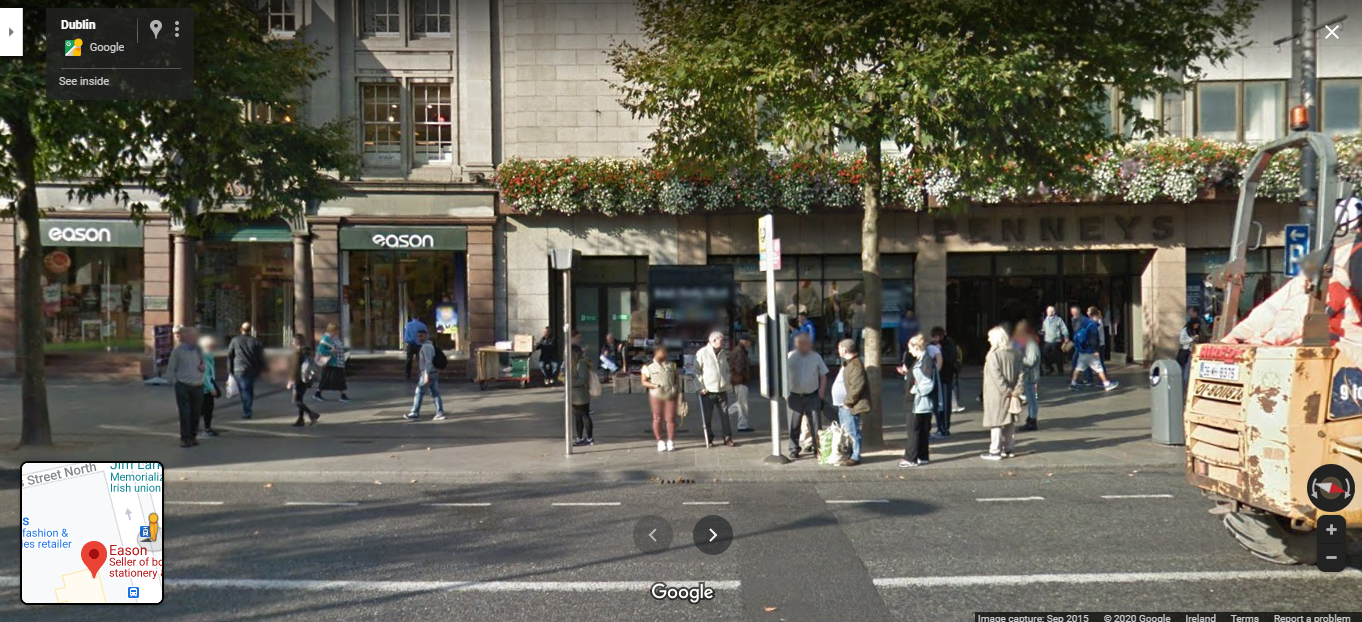

Turns out Penneys is right beside Easons so I will change easons to match penneys as we can consider these to be the same people.

Now to look at grafton street, there are few different types of this one:
'Grafton St at Card Gallery', 'Grafton St at M&S', 'Grafton at Korkys', 'Grafton Street at CompuB', 'Grafton Street - Nassau Street - Suffolk Street'

Grafton Street at Korkys closed down a few years ago finding a specific location for it was quite difficult.
Here is an interesting article to give some background:
[Why Korky Closed Down](https://www.independent.ie/irish-news/shoe-shop-korkys-loses-eight-year-battle-against-rising-rents-28956042.html)

Below is the spread of the locations, look for the 3 purple cameras, turns out you can create your own google map and plot multiple points
 
There appears to be many locations representing the same vicinity. I think it is best if we simplify. Therefore I want to combine any columns which are on the same street. When in the mindset of analysing the data I think this makes the most
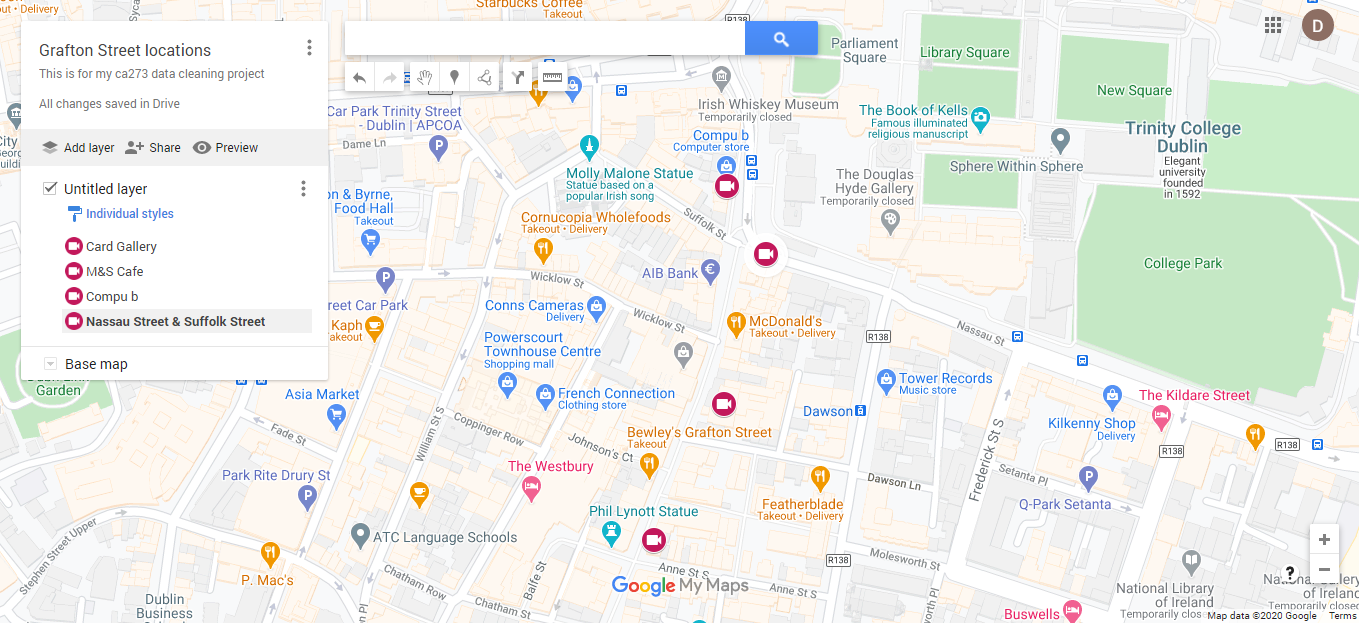

##2020/2019 Column Transformation

In [ ]:
nteen_twenty = nteen.append(twenty).reset_index().iloc[:, 1:]
nteen_twenty

In [429]:
# I am going to combine all the o'connell street columns, however AIB didn't set up until 3-19-2019 so before that
# all values were zero, to use this in the average of the O'Connell Street column would skew the data toward the date
# therefore I am going to split the data, before and after this date

before_aib = nteen_twenty.loc[nteen_twenty['Datetime'] < pd.Timestamp(2019, 3, 19)]
after_aib = nteen_twenty.loc[nteen_twenty['Datetime'] >= pd.Timestamp(2019, 3, 19)]

In [430]:
b = (before_aib["O'Connell St at Clerys"] + before_aib["O'Connell St at Pennys"]) // 2
a = (after_aib["O'Connell St at Clerys"] + after_aib["O'Connell St at Pennys"] + after_aib["O'Connell St Parnell St at AIB"]) // 3

nteen_twenty["O'Connell Street"] = b.append(a)

In [432]:
# Creating College Green
nteen_twenty['College Green'] = (nteen_twenty['College Green at Bank Of Ireland'] 
                                + nteen_twenty['College Green at Church Lane'] 
                                + nteen_twenty['College Green at Dame St Side']) // 3

In [434]:
# Summing the two columns because they complement each other, similar to a set disjoint
nteen_twenty['Dawson Street'] = nteen_twenty['Dawson Street'] + nteen_twenty['Dawson Street Replacement']

In [437]:
# New Grafton Street Locations set up on 27-2-2019 however didn't truly start collection information until 9-3-2019
# Old Grafton Street stopped collection data on 20-5-2020

# This is when the only the old location was running
old =  nteen_twenty.loc[pd.Timestamp(2019, 3, 9) > nteen_twenty['Datetime']]

# This here is the data between the new Grafton spot setting up and the old Grafton spot stopping
old_new = nteen_twenty.loc[(pd.Timestamp(2019, 3, 9) <= nteen_twenty['Datetime']) 
                            & (nteen_twenty['Datetime'] < pd.Timestamp(2020, 5, 20))]

# This is after the old Grafton spot stopping
new = nteen_twenty.loc[pd.Timestamp(2020, 5, 20) <= nteen_twenty['Datetime']]

# Updating the values for Grafton Street when all locations were running
old_new['Grafton Street'] = (old_new['Grafton Street'] 
                            + old_new['Grafton Street - Nassau Street - Suffolk Street'] 
                            + old_new['Grafton Street at CompuB']) // 3

#Updating the values for Grafton Street when the old location shut down
new['Grafton Street'] = (new['Grafton Street - Nassau Street - Suffolk Street'] 
                            + new['Grafton Street at CompuB']) // 2

# Updating Grafton Street 2019/2020
tmp = old['Grafton Street'].append(old_new['Grafton Street'])
nteen_twenty['Grafton Street'] = tmp.append(new['Grafton Street'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [439]:
# Updating the Westmoreland Street
nteen_twenty['Westmoreland Street'] = (nteen_twenty['Westmoreland Street East']
                                       + nteen_twenty['Westmoreland Street West']) // 2

In [442]:
# Creating Talbot Street
nteen_twenty['Talbot Street'] = (nteen_twenty['Talbot Street South']
                                       + nteen_twenty['Talbot Street North']) // 2

In [444]:
columns = ["O'Connell St at Pennys", "O'Connell St at Clerys", 'Grafton Street at CompuB', 'Talbot Street North',  'Dawson Street Replacement', 'Talbot Street South', "O'Connell St Parnell St at AIB", 'Grafton Street - Nassau Street - Suffolk Street', 'College Green at Bank Of Ireland', 'Westmoreland Street East', 'Westmoreland Street West', 'College Green at Church Lane', 'College Green at Dame St Side']
nteen_twenty = nteen_twenty.drop(columns, axis=1)

In [445]:
nteen_twenty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16050 entries, 0 to 16049
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Datetime                   16050 non-null  datetime64[ns]
 1   Mary Street                16050 non-null  int64         
 2   Capel Street               16050 non-null  int64         
 3   Aston Quay                 16050 non-null  int64         
 4   Doilier Street Burgh Quay  16050 non-null  int64         
 5   Dame Street                16050 non-null  int64         
 6   Henry Street               16050 non-null  int64         
 7   Dawson Street              16050 non-null  int64         
 8   Liffey Street              16050 non-null  int64         
 9   Grafton Street             16050 non-null  int64         
 10  Bachelors Walk             16050 non-null  int64         
 11  O'Connell Street           16050 non-null  int64         
 12  Coll

## 2008/2010 Column Tranformation

In [450]:
# Combining 2008 and 2010
eight_ten = eight_df.append(ten_df)

In [451]:
# Creating O'Connell Street
eight_ten["O'Connell Street"] = (eight_ten["O'Connell Street at Clerys"] + eight_ten["O'Connell Street at Easons"]) // 2

In [452]:
# Creating Grafton Street
eight_ten['Grafton Street'] = (eight_ten['Grafton St at Card Gallery'] 
                               + eight_ten['Grafton St at Korkys'] + eight_ten['Grafton St at M&S']) // 3

In [454]:
# Creating Changing Henry Street at Butler to Henry Street
eight_ten.columns = ['Datetime', "O'Connell Street at Clerys", 'Grafton St at Card Gallery', 'Grafton St at M&S', "O'Connell Street at Easons", 'Henry Street', 'Grafton St at Korkys', "O'Connell Street", 'Grafton Street']

In [455]:
# Drop columns
drop = ["O'Connell Street at Clerys", "O'Connell Street at Easons", 'Grafton St at Card Gallery', 'Grafton St at Korkys', 'Grafton St at M&S']
eight_ten = eight_ten.drop(drop, axis=1)

In [456]:
eight_ten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17521 entries, 0 to 8736
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Datetime          17521 non-null  datetime64[ns]
 1   Henry Street      17521 non-null  int64         
 2   O'Connell Street  17521 non-null  int64         
 3   Grafton Street    17521 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 684.4 KB


In [459]:
# This for filling missing columns in both datasets
for column in eight_ten.columns:
  if column not in nteen_twenty.columns:
    nteen_twenty[column] = [0] * len(nteen_twenty)

In [460]:
for column in nteen_twenty.columns:
  if column not in eight_ten.columns:
    eight_ten[column] = [0] * len(eight_ten)

#Final Combining
Now I want to finally combine 2008, 2010 and 2019/2020

In [461]:
complete_dataset = eight_ten.append(nteen_twenty)

In [462]:
complete_dataset

,Datetime,Henry Street,O'Connell Street,Grafton Street,Mary Street,Capel Street,Aston Quay,Doilier Street Burgh Quay,Dame Street,Dawson Street,Liffey Street,Bachelors Walk,College Green,Westmoreland Street,Talbot Street
0,2008-01-01 00:00:00,467,1221,1559,0,0,0,0,0,0,0,0,0,0,0
1,2008-01-01 01:00:00,349,1059,1545,0,0,0,0,0,0,0,0,0,0,0
2,2008-01-01 02:00:00,261,1279,1841,0,0,0,0,0,0,0,0,0,0,0
3,2008-01-01 03:00:00,286,1454,1744,0,0,0,0,0,0,0,0,0,0,0
4,2008-01-01 04:00:00,152,432,691,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16045,2020-09-30 19:00:00,908,518,427,0,275,420,1285,0,7,250,367,155,400,3108
16046,2020-09-30 20:00:00,452,354,324,0,415,307,832,0,2,183,345,105,382,2816
16047,2020-09-30 21:00:00,275,188,418,0,173,262,635,0,79,187,91,59,250,2907
16048,2020-09-30 22:00:00,167,133,427,0,125,172,507,0,86,72,118,47,183,2345


In [463]:
complete_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33571 entries, 0 to 16049
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Datetime                   33571 non-null  datetime64[ns]
 1   Henry Street               33571 non-null  int64         
 2   O'Connell Street           33571 non-null  int64         
 3   Grafton Street             33571 non-null  int64         
 4   Mary Street                33571 non-null  int64         
 5   Capel Street               33571 non-null  int64         
 6   Aston Quay                 33571 non-null  int64         
 7   Doilier Street Burgh Quay  33571 non-null  int64         
 8   Dame Street                33571 non-null  int64         
 9   Dawson Street              33571 non-null  int64         
 10  Liffey Street              33571 non-null  int64         
 11  Bachelors Walk             33571 non-null  int64         
 12  Coll

In [464]:
complete_dataset.describe()

,Henry Street,O'Connell Street,Grafton Street,Mary Street,Capel Street,Aston Quay,Doilier Street Burgh Quay,Dame Street,Dawson Street,Liffey Street,Bachelors Walk,College Green,Westmoreland Street,Talbot Street
count,33571.000000,33571.000000,33571.000000,33571.000000,33571.000000,33571.000000,33571.000000,33571.000000,33571.000000,33571.000000,33571.000000,33571.000000,33571.000000,33571.000000
mean,1726.666528,1315.730482,1936.907867,55.152840,75.455423,323.860207,213.587084,157.361741,104.193292,292.451431,117.838551,173.039022,285.882637,369.452563
std,2158.267639,1566.222830,2448.603030,150.653274,170.094965,669.303226,419.541213,344.418590,219.923340,561.050764,468.790919,354.798886,447.732734,1169.499465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,130.000000,194.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,675.000000,751.000000,968.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2869.500000,1819.500000,2447.000000,16.000000,87.000000,360.500000,230.000000,136.000000,100.000000,301.000000,53.000000,200.000000,475.500000,236.000000
max,13625.000000,11379.000000,14738.000000,1263.000000,5883.000000,4953.000000,5995.000000,2341.000000,2047.000000,4700.000000,10779.000000,2466.000000,2634.000000,13232.000000


In [490]:
complete_dataset.to_csv('/content/complete-dataset.csv')

# Clerys Exercise

In [484]:
clerys = ten_df[['Datetime', "O'Connell Street at Clerys"]]
tmp = nteen[['Datetime', "O'Connell St at Clerys"]].append(twenty[['Datetime', "O'Connell St at Clerys"]])
tmp.columns = ['Datetime', "O'Connell Street at Clerys"]
clerys = clerys.append(tmp)

In [485]:
clerys

,Datetime,O'Connell Street at Clerys
0,2010-01-01 00:00:00,852
1,2010-01-01 01:00:00,736
2,2010-01-01 02:00:00,1064
3,2010-01-01 03:00:00,1646
4,2010-01-01 04:00:00,598
...,...,...
7290,2020-09-30 19:00:00,487
7291,2020-09-30 20:00:00,432
7292,2020-09-30 21:00:00,222
7293,2020-09-30 22:00:00,166


In [489]:
clerys.loc[clerys['Datetime'].dt.month == 5].sum()

O'Connell Street at Clerys    2094441
dtype: int64